**Facebook Live sellers in Thailand, UCI ML Repo**

## Importing required Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Reading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\omkar\OneDrive\Documents\Python Files jupyternotebook\Project dataset\Facebook Live sellers in Thailand, UCI ML Repo.xls")# File load

 What About data is : Live selling is becoming increasingly popular in Asian countries. Small vendors can now reach a wider audience and connect with many customers.

In [3]:
df.shape # size of data like column and rows in dataset

(7050, 16)

It shows that we have 7050 rows and 16 features n given dataset

In [4]:
df.head() # show the head rows of data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
df.info() # showing thw information about data like datattype null value in column etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

Using of .info fuction can see that what kind of data we have its datatype how many features present in that dataset how many rows and how many null values in that dataset 

In [6]:
df.isnull().sum() # finding the null values from the dataset

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

here we are cheking for the null values and we got that in last four columns are totally empty

In [7]:
df.drop(['Column1','Column2','Column3','Column4'],axis = 1,inplace = True)
# droping the column which in irrelevent or having null values in dataset

 As above we know that last four column does nt containing any value thats why we dot need that features for the predection and it does not aafect our final prediction we can delete that feature

In [8]:
df.shape # agian check the size of dataset

(7050, 12)

Now we have 7050 rows and the 12 features for prediction

In [9]:
df.info() # again check the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [10]:
df.describe() # description of values

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


Using of describe function we can get information about the data like total count of the rows present in perticular featre saperatyly and mean,standartd deviavtion 25% of the feaure value ,50% of feature vale ,75% of feature value  minimum value from that feature maximum of the feature this kind of information we can easy get by usinng this function

In [11]:
df['status_id'].unique() # View the label in column which is unique

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [12]:
len(df['status_id'].unique()) # check how many unique id present in dataset

6997

In [13]:
df['status_published'].unique() #View the label in column which is unique

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [14]:
len(df['status_published'].unique()) #View the label in column which is unique

6913

In [15]:
df['status_type'].unique()#View the label in column which is unique

array(['video', 'photo', 'link', 'status'], dtype=object)

In [16]:
len(df['status_type'].unique()) #View the label in column which is unique

4

## Droping the irrelaven columns

In [17]:
df.drop(['status_id','status_published'],axis = 1, inplace =True)
# droping  the column

In [18]:
df.info() # checking info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [19]:
df.head() # checking head rows

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [20]:
x = df
y = df['status_type']
# assign x for df and y for the column status_type from the dataset

## Encoding the values in suitabe 

In [21]:
from sklearn.preprocessing import LabelEncoder # importing the fuction LabelEncoder from sklearn
le = LabelEncoder() # assign le for LabelEncoder
x['status_type']=le.fit_transform(x['status_type'])
 # The fit_transform() method is used to fit the data into a model and transform it into a form that is more suitable for the model in a single step
y = le.transform(y)# assigning y for transformed column

In [42]:
y # cheking the Y

array([3, 1, 3, ..., 1, 1, 1])

In [23]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int32
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int32(1), int64(9)
memory usage: 523.4 KB


In [24]:
x.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [25]:
cols = x.columns

In [26]:
cols

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

##  Data Scaling with Min-Max Scaling using Scikit-Learn

In [27]:
from sklearn.preprocessing import MinMaxScaler # importing function MinMaxScaler
ms = MinMaxScaler()
# There is another way of data scaling, where the minimum of feature is made equal to zero and the maximum of feature equal to one.
x = ms.fit_transform(x) # x for the transformed x column

In [28]:
x = pd.DataFrame(x, columns = [cols])

In [29]:
x.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


## Model selction

In [45]:
from sklearn.cluster import KMeans # importing KMean function from sklearn
kmeans = KMeans(n_clusters = 4, random_state = 1) # cluster the data with two part respect to mean and k value is 2
kmeans.fit(x)

C:\Users\omkar\anaconda3\envs\notebook\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=1)

In [46]:
kmeans.cluster_centers_

array([[3.50769464e-01, 1.94527054e-02, 6.73756187e-04, 5.12576013e-04,
        1.89899309e-02, 1.88865454e-03, 1.97567668e-03, 1.10237293e-03,
        3.28209519e-03, 1.48928522e-03],
       [1.00000000e+00, 3.70762995e-02, 2.38485859e-02, 2.47674444e-02,
        3.13111517e-02, 3.78268104e-02, 2.46348376e-03, 7.32261369e-03,
        5.97833539e-03, 5.20339875e-03],
       [4.08568443e-01, 3.71373520e-01, 2.98440368e-03, 4.06955878e-03,
        3.69770847e-01, 6.34593455e-03, 1.08364719e-02, 1.97671865e-03,
        9.83465487e-04, 2.02244919e-04],
       [1.00000000e+00, 3.22288500e-01, 1.07331534e-01, 1.36127491e-01,
        2.81808378e-01, 2.38723394e-01, 8.07925089e-02, 5.33818623e-02,
        3.23685030e-02, 4.21573647e-02]])

In [47]:
kmeans.inertia_


129.12904214630464

 Inertia is not a normalized metric.

 The lower values of inertia are better and zero is optimal.

 But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).


In [48]:
labels = kmeans.labels_ # LAbeling the kmean. labels as name of labels


In [49]:
labels

array([1, 0, 1, ..., 0, 0, 0])

In [50]:
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled."%(correct_labels, y.size))
correct_labels

Result: 324 out of 7050 samples were correctly labeled.


324

In [53]:
print('Accuracy score: {0:0.2f}'.format(correct_labels/float(y.size))) # Cheking for accuracy with k mean clustring value 4

Accuracy score: 0.05


# Use elbow method to find optimal number of clusters

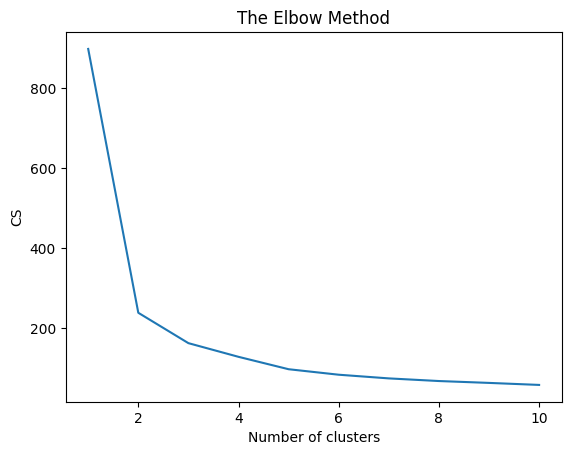

In [38]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11),cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(x)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4288 out of 7050 samples were correctly labeled.
Accuracy score: 0.61


C:\Users\omkar\anaconda3\envs\notebook\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Now here we change the k mean clusturing value as 3 to check the accuracy and prediction how it accurate as expected

In [40]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(x)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4165 out of 7050 samples were correctly labeled.
Accuracy score: 0.59


C:\Users\omkar\anaconda3\envs\notebook\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


here we use k mean clustering(n_clusters as 4) for accuracy check

In [41]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(x)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4347 out of 7050 samples were correctly labeled.
Accuracy score: 0.62


C:\Users\omkar\anaconda3\envs\notebook\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
